In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style="whitegrid")
energy_table = pd.read_csv('../BDD/UK/primary-energy-consumption.csv', sep=';')
gdp_table = pd.read_csv('../BDD/UK/GDP-per-capita-in-the-uk-since-1270.csv')
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)

pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='GBR']
UK_table = pd.merge(gdp_table, pop_table, on=['Year'])
UK_table = pd.merge(UK_table, energy_table, on=['Year'])
UK_table.head()

,Year,Real GDP per capita,Entity,Code,"Total population (Gapminder, HYDE & UN)",Energy (PetaJoules),Energy (TWh)
0,1800,2331.7300,United Kingdom,GBR,12327466,520.65,159.690958
1,1801,2338.0801,United Kingdom,GBR,12483870,524.89,160.991428
2,1802,2348.0200,United Kingdom,GBR,12642258,529.14,162.294965
3,1803,2271.5200,United Kingdom,GBR,12802656,533.38,163.595435
4,1804,2239.8501,United Kingdom,GBR,12965089,537.63,164.898972


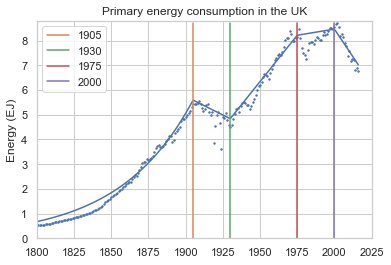

In [25]:
year = UK_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)
pop = UK_table['Total population (Gapminder, HYDE & UN)']
energy = UK_table['Energy (PetaJoules)']
gdp = UK_table['Real GDP per capita ']*pop
plt.scatter(year, 0.001*energy, s=2)
plt.title("Primary energy consumption in the UK")
plt.ylabel("Energy (EJ)")
plt.xlim(1800, 2025)
plt.ylim(0,8.8)

r, y0 = reg.expReg(year[:20], energy[:20])
y0, r, a,c,e,g,x1,x2,x3,x4 = reg.expLLLL(year, energy, p0 = (1.15*10**-13,  0.02016948382301577, -30,75,10,-90,1905,1930,1975,2000), bounds=[-200, 2100])
plt.plot(yplot, 0.001*reg.expllll(yplot,1.15*10**-13,  0.02016948382301577, -30,75,10,-90,1905,1930,1975,2000))
plt.plot([1905,1905],[0,8.7], label = '1905')
plt.plot([1930,1930],[0,8.7], label = '1930')
plt.plot([1975,1975],[0,8.7], label = '1975')
plt.plot([2000,2000],[0,8.7], label = '2000')
plt.legend()

In [4]:
ypred= reg.expllll(year,1.15*10**-13,  0.02016948382301577, -30,75,10,-90,1905,1930,1975,2000)
UK_table['Energy(PJ)-Time(Year)'] = ypred

(0.0, 2100000000000.0)

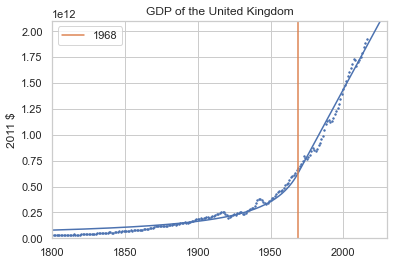

In [14]:
import regressions as reg 
g= gdp/10**12 
yplot = np.linspace(year.min(), year.max()+10, 200)
plt.scatter(year, (10**12)*g, s=2)
plt.title('GDP of the United Kingdom')
# plt.plot(yplot, reg.hyp_lin_lin(yplot,12, 1987, 0.024,0.022, 1968, 2100 ))
b,c,d,f,x1,x2 = reg.hypLinLin(year, g, p0 =(11, 1978, 0.024,0.022, 1959, 2100 ))
plt.plot(yplot, (10**12)*reg.hyp_lin_lin(yplot, b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.1*10**12], label = str(int(x1)))
plt.legend()
ypred=  (10**12)*reg.hyp_lin_lin(year, b,c,d,f,x1,x2)
UK_table['GDP(2011$)-Time(year)']= ypred
plt.ylabel('2011 $')
plt.xlim(1800, 2030)
plt.ylim(0, 2.1*(10**12))

(0.18924547407192002, 5.00281, 9.999725341796875, 1.1809241517974003, 1.938254889837039, -0.3887753272876469)


(0.0, 9.0)

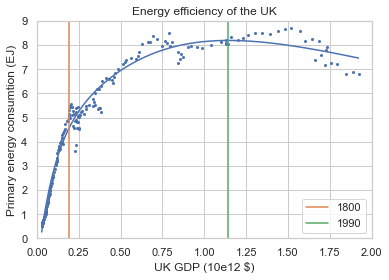

In [20]:
from regressions import sReg, s_model
import numpy as np
e = energy/10**3
g =gdp/10**12
gplot = np.linspace(g.min(), g.max(), 200)
G_i, E_i, A, a1, a2, a3 = sReg(g,e , bounds=[-5, 20])
plt.plot(gplot, s_model(gplot, G_i, E_i, A, a1, a2, a3))
plt.scatter(g,e, s=4)
dist_inf = np.array([abs(g[i]-G_i) for i in range(len(g))])
inflexion_year = year[dist_inf.argmin()]
plt.plot([0.18924547407192002, 0.18924547407192002], [0, 9], label = str(inflexion_year))

g_zero = gplot[s_model(gplot, G_i, E_i, A, a1, a2, a3).argmax()]
dist_zer = np.array([abs(g[i]-g_zero) for i in range(len(g))])
zero_year  = year[dist_zer.argmin()]
plt.plot([g_zero, g_zero], [0, 9], label = str(zero_year))
plt.legend()

plt.xlabel('UK GDP (10e12 $)')
plt.ylabel('Primary energy consumtion (EJ)')
plt.title('Energy efficiency of the UK')
ypred= (10**3)*s_model(g, G_i, E_i, A, a1, a2, a3)
UK_table['Energy(PJ)-GDP(10e12$)'] = ypred
plt.xlim(0,2)
plt.ylim(0,9)

(0.0, 3.0000000000000004e-08)

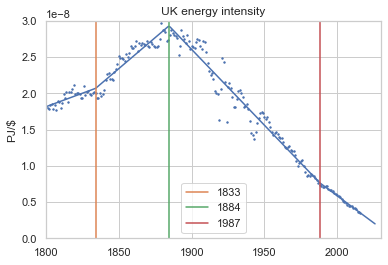

In [21]:
plt.scatter(year, energy/gdp, s= 2)

a,b, c, e, g, x1, x2, x3 = 0.2, 5,  0.3, -0.4, -0.3, 1850, 1890, 1975
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**8, p0= (a,b, c, e, g, x1, x2, x3 ) )
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3)*(10**-8))
plt.plot([x1, x1], [0, 3*(10**-8)], label = str(int(x1)))
plt.plot([x2, x2], [0, 3*(10**-8)], label = str(int(x2)))
plt.plot([x3, x3], [0, 3*(10**-8)], label = str(int(x3)))
plt.legend()
plt.ylabel("PJ/$")
plt.title("UK energy intensity")
ypred= reg.llll(year, a,b, c, e, g, x1, x2, x3)*(10**-8)
UK_table['EI(PJ/$)-Time(year)'] = ypred
plt.xlim(1800,2030)
plt.ylim(0,3*10**-8)

In [7]:
tab

NameError: name 'tab' is not defined

In [16]:
final_energy = pd.read_csv('../BDD/UK/final-energy-consumption.csv', sep= ';')
final_energy['Sector'].unique()
final_year= []
final_en = []
for y in range(1970,2019) : 
    final_year.append(y)
    tab = final_energy[final_energy.Year == y]
    en = 0
    for e in tab['Consumption (Ktoe)'] : 
        en+=e 
    final_en.append(en*4.1868*10**-2)
data_final = np.array([final_year, final_en])

final_data = pd.DataFrame(np.transpose(data_final), columns=['Year', 'Consumption'])
final_data.head()
final = pd.merge(final_data, UK_table, on='Year')

Text(0.5, 1.0, 'UK enegry consumption')

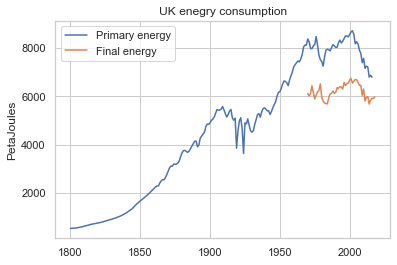

In [17]:
plt.plot(year, energy, label='Primary energy')
plt.plot(final_year, final_en, label='Final energy')
plt.legend()
plt.ylabel('PetaJoules')
plt.title('UK enegry consumption')

Text(0.5, 1.0, 'Efficacité énergétique UK')

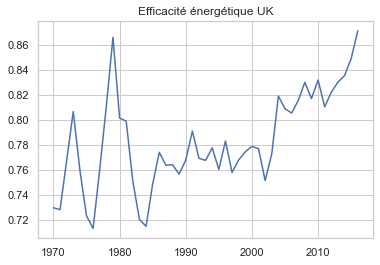

In [18]:
A = np.array(energy[170:])
B= np.array(final_en[:47])
C = B/A
plt.plot(year[170:], C)
plt.title("Efficacité énergétique UK")

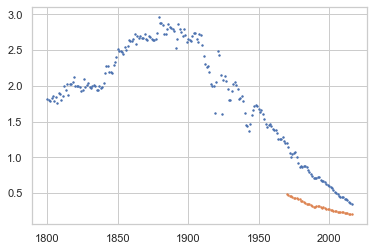

In [19]:
plt.scatter(year, energy/gdp*10**8, s= 2)
plt.scatter(final['Year'], final['Consumption']/final['Real GDP per capita '], s=2)

In [20]:
def sum(table) : 
    s = 0
    for i in table : 
        s+=i 
    return s

def growth_rate(x, y,s = 1, a = 1  ) : 
    # vérifier que le pas de x est bien de 1, sinon interpoler linéairement
    x_min, x_max =x.min(),x.max()
    X = np.arange(x_min, x_max,1 )
    Y=  []
    i= 0
    s1, s2  = s// 2, s- s//2
    a1, a2 = a//2, a- a//2
    r, m, x_r, x_m = [], [], [], []

    for val in X :
        if int(val) in list(x) : 
            Y.append(y[i])
            i+=1
        else : 
            slope =( y[i]-y[i-1])/(x[i]-x[i-1])
            origin = y[i]-slope*x[i]
            ynew= slope*val+origin
            Y.append(ynew)

    # compute r_n(s)

    for n in range(0,s1) : 
        x_r.append(x_min+n)
        rn= ((Y[n+s]-Y[n])/Y[n+s])*100
        r.append(rn)
    for n in range(s1, len(X)-s2) : 
        x_r.append(x_min+n)
        rn= ((Y[n+s2]-Y[n-s1])/Y[n-s1])*100
        r.append(rn)
    for n in range (len(X)-s2, len(X)) :
        x_r.append(x_min+n)
        rn= ((Y[n]-Y[n-s])/Y[n-s])*100
        r.append(rn)
    # compute avg 
    for n in range(a1, len(x_r)-a2) : 
        x_m.append(np.array(x_r).min()+n)
        mn = sum(r[n-a1:n+a2])*(1/a)
        m.append(mn)

    
    return x_m, m



    


In [21]:
 x, y=growth_rate(year, energy, s=10, a =15 )
 x1,y1 = growth_rate(year, gdp, s=10, a=15)

Text(0.5, 1.0, 'Variation in (%) UK')

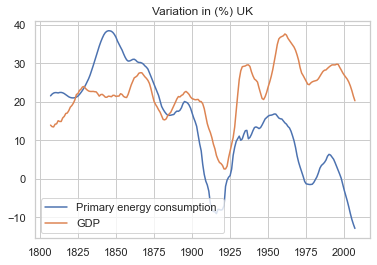

In [22]:
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%) UK")

In [25]:

UK_table =UK_table.rename(columns={'Energy (PetaJoules)':'Primary energy (PJ)', 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })

In [26]:
UK_table.to_csv('../BDD/GBR.csv', index=False)